<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


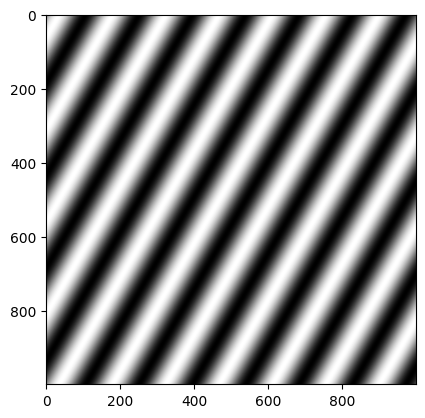

In [72]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.pi/6                 # Angulo de inclinacion de la rejilla
x = np.linspace(0, 2000,1000)   # Arreglo de numeros para los ejes x e y
X, Y = np.meshgrid(x, x)        # Rerpesentacin en "2D" de los ejes
wavelength = 250                # Longitud de onda de la señal senoidal creada

# Sinusoidal Grating
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle))/wavelength)


# Figura
plt.imshow(grating)
plt.show()



## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


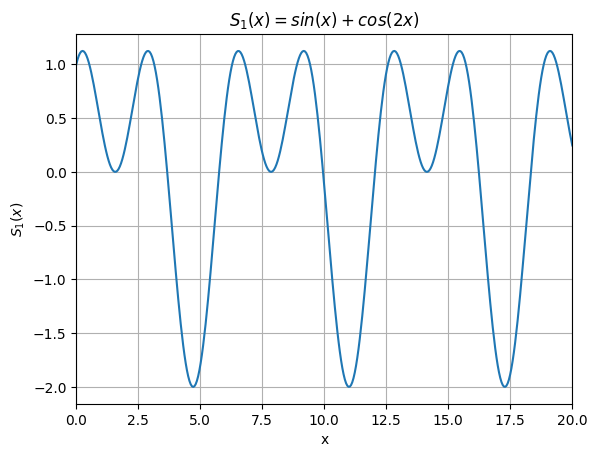

In [73]:

fs = 20                                 # Frecuencia de muestreo
n0 = 0                                  # Valor inicial del vector de muestras
nf = 20                                 # Valor final del vector de muestras
x = np.linspace(n0,nf,(nf-n0)*fs)       # Vector de muestras

s1 = np.sin(x)+np.cos(2*x)              # Señal S1(x)

# Figuras
plt.plot(x,s1)
plt.xlim([n0,nf])
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$S_{1}(x)$')
plt.title(r'$S_{1}(x) = sin(x) + cos(2x)$')
plt.show()


### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

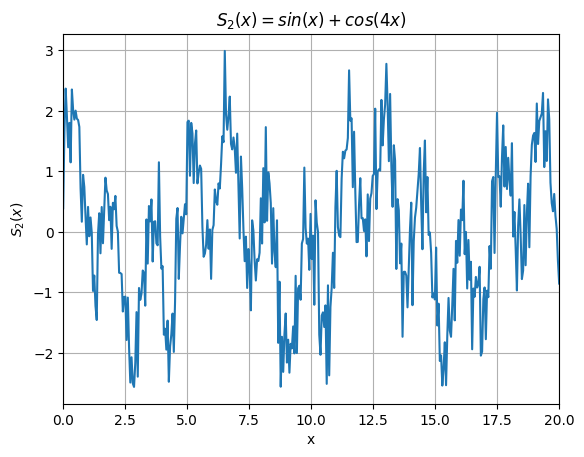

In [74]:
# Señal s2(t)
s2 = np.cos(x) + np.sin(4*x)

media = 0
std_dev = 0.5

ruido = np.random.normal(media, std_dev, len(s2))

s2_noise = s2 + ruido


plt.plot(x,s2_noise)
plt.xlim([n0,nf])
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$S_{2}(x)$')
plt.title(r'$S_{2}(x) = sin(x) + cos(4x)$')
plt.show()


## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


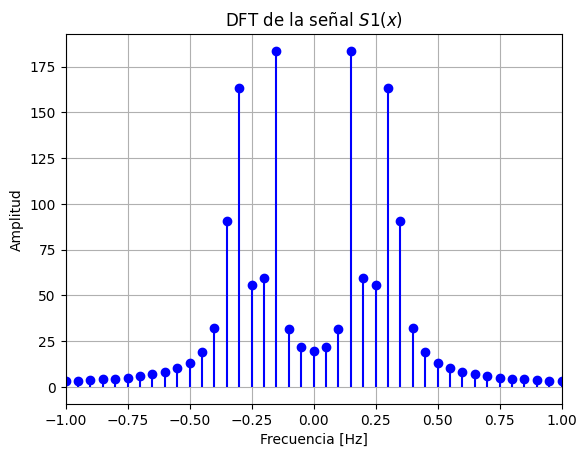

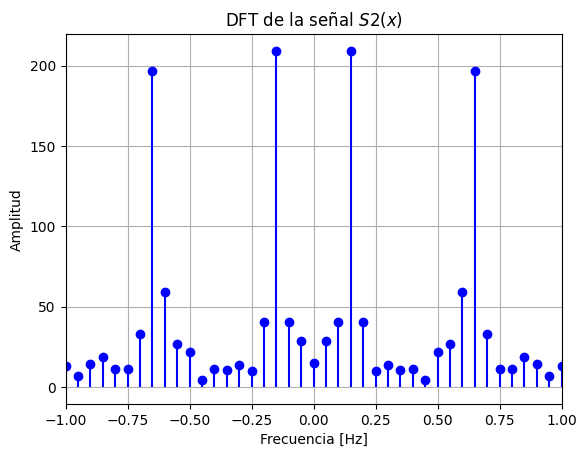

In [75]:
from scipy.fft import fftfreq

# Algoritmo transformada de fourier
def dft(signal):
    N = len(signal)
    X = np.zeros(N, dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            X[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# DFT de la señal
S1 = dft(s1)
S2 = dft(s2_noise)

# Obtencion de las frecuencias para graficar
freqs = fftfreq((nf-n0)*fs, nf/((nf-n0)*fs))

# Graficos Señal S1
plt.stem(freqs, np.abs(S1),linefmt='b-', markerfmt='bo', basefmt=' ')
#plt.xticks(np.arange(-1,1,step=0.3))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title(r'DFT de la señal $S1(x)$')
plt.grid()
plt.xlim([-1,1])
plt.show()

# Graficos señal S2
plt.stem(freqs, np.abs(S2),linefmt='b-', markerfmt='bo', basefmt=' ')
#plt.xticks(np.arange(-1,1,step=0.3))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title(r'DFT de la señal $S2(x)$')
plt.grid()
plt.xlim([-1,1])
plt.show()


### 3.2 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

#### Resultado normalizado:

la normalización se refiere a la manipulación de los valores de una señal para que cumplan ciertas características deseables o para facilitar su comparación con otras señales. En este caso, la normalización de la amplitud de la Transformada de Fourier de una señal implica ajustar los valores de la magnitud de la FFT para que estén en una escala predefinida y puedan ser fácilmente comparables entre diferentes señales. Esto se logra dividiendo los valores de la magnitud de la FFT por el número de puntos en la señal original, lo que compensa el efecto del tamaño de la señal en la amplitud de la FFT. El proceso garantiza que la amplitud de la FFT esté en una escala que sea independiente de la longitud de la señal original, facilitando así su análisis y comparación. En este caso, se multiplica la magintud de la señal por $2/N$, debido a que el algoritmo de la fft calcula las magnitudes para las frecuencias negativas tambien

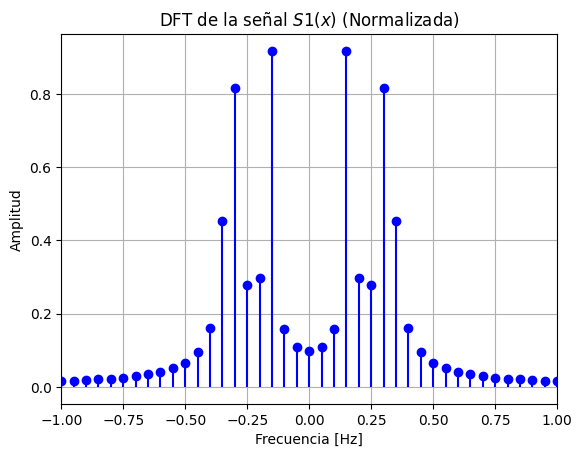

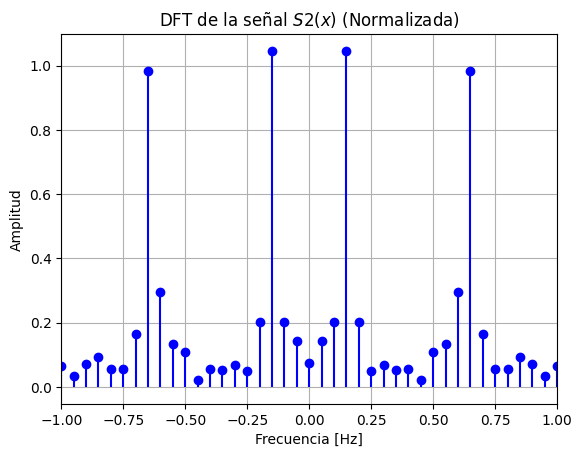

In [76]:
# Graficos Señal S1
plt.stem(freqs, 2/((nf-n0)*fs)*np.abs(S1),linefmt='b-', markerfmt='bo', basefmt=' ')
#plt.xticks(np.arange(-1,1,step=0.3))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title(r'DFT de la señal $S1(x)$ (Normalizada)')
plt.grid()
plt.xlim([-1,1])
plt.show()

# Graficos señal S2
plt.stem(freqs, 2/((nf-n0)*fs)*np.abs(S2),linefmt='b-', markerfmt='bo', basefmt=' ')
#plt.xticks(np.arange(-1,1,step=0.3))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title(r'DFT de la señal $S2(x)$ (Normalizada)')
plt.grid()
plt.xlim([-1,1])
plt.show()


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.


<b>Explicacion:</b> La función ifft de la biblioteca SciPy calcula la inversa de la Transformada de Fourier Discreta (FFT), transformando una señal del dominio de la frecuencia al dominio del tiempo. Cuando se aplica la Transformada de Fourier Discreta (FFT) a una señal real, como las señales de audio o las señales de sensor, esta se descompone en componentes de frecuencia positivas y negativas. La simetría entre estas componentes en el dominio de la frecuencia implica que la parte imaginaria de la salida de la FFT sea prácticamente nula o insignificante. Por lo tanto, al calcular la inversa de la FFT (IFFT) para reconstruir la señal en el dominio del tiempo, la parte imaginaria de la señal reconstruida es despreciable, mientras que la parte real contiene la información relevante de la señal original. Esto se debe a que la parte imaginaria surge de las diferencias de fase entre las frecuencias positivas y negativas, pero en una señal real, estas diferencias suelen ser mínimas. Así, al graficar o analizar la señal reconstruida, se considera relevante solo la parte real, ya que contiene toda la información necesaria sobre la señal original en el dominio del tiempo. 



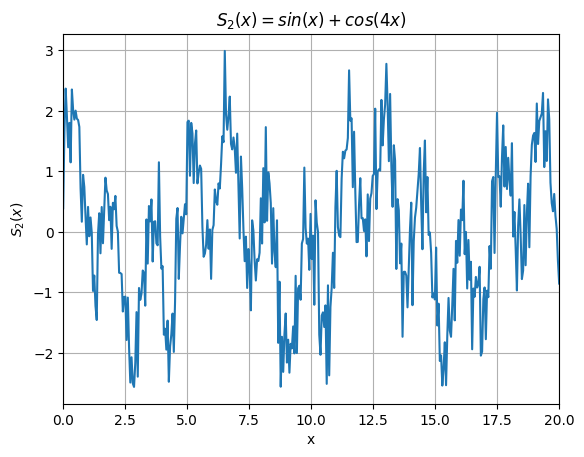

In [77]:
# Libreria a utilizar
from scipy.fft import ifft

# Señal reconstruida
s2_reconsruida = np.real(ifft(S2))

plt.plot(x,s2_reconsruida)
plt.xlim([n0,nf])
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$S_{2}(x)$')
plt.title(r'$S_{2}(x) = sin(x) + cos(4x)$')
plt.show()


### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo 
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

$F(m,n) = \frac{1}{MN}\sum^{M-1}_{x=0}\sum^{N-1}_{y=0}f(x,y)exp(-2\pi i \left(\frac{x}{M}m +\frac{y}{N}n\right))$

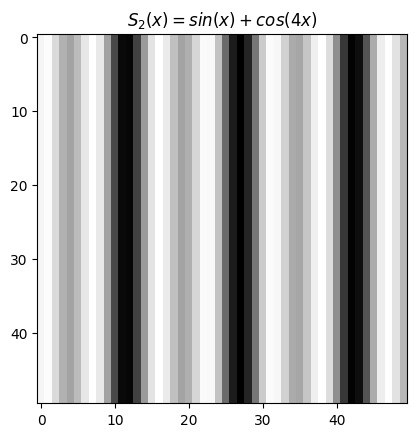

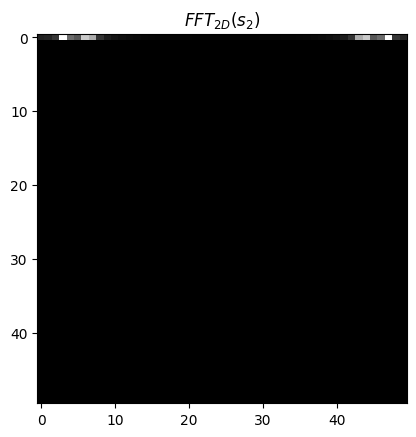

In [78]:
# Funcion para determinar la DFT-2D
def dft2(gratings):
    M,N = gratings.shape 
    X = np.zeros((M,N), dtype=np.complex128)
    for m in range(M):
        for n in range(N):
            for x in range(M):
                for y in range(N):    
                    X[m,n] += gratings[x,y] * np.exp(-2j * np.pi * (x/M*m + y/N*n))

    X = X*1/(M*N)                
    return X

    
# Se debe ajustar el muestreo debido al tiempo que toma el aplicar la funcion   
x = np.linspace(0,20,50)   

# Señal 1 Ajustada en su dimension 
X,Y = np.meshgrid(x,x)
s1 = np.sin(X)+np.cos(2*X)              # Señal S1(x)

# DFT-2D para s1(x,y)
S1 = dft2(s1)


# Grafico de S1(x,y)
plt.set_cmap("gray")
plt.title(r'$S_{2}(x) = sin(x) + cos(4x)$')
plt.imshow(s1)
plt.show()

# DFT-2D de S1(x,y)
plt.title(r'$FFT_{2D}(s_{2})$')
plt.set_cmap("gray")
plt.imshow(np.abs(S1))
plt.show()



### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

<b>Punto 1</b>: al agregar ruido a la señal generada, se puede observar en su grafica como se distorsiona la señal, sin embargo, en su espectro en frecuencias utilizando la transformada de fourier, se observa que sus componentes fundamentales son las que prevalecen, a pesar de que existan otras componentes en frecuencia que no corresponden a la señal original y que son parte del ruido. Se puede observar que mientras mas se aumenta la desviacion estandar del ruido, la señal se observa irreconocible en el dominio del tiempo. Sin embargo, en el dominio de frecuencias, se puede observar que las componentes originales de la señal (en este caso cos(x) y sin(4x)) son las que tienen mayor energia en comparacion con las componentes del ruido. Pero si el ruido es muy grande comparado con la señal original, existe distorsion tambien en el dominio de la frecuencia, y es mas complicado poder recuperar la señal original

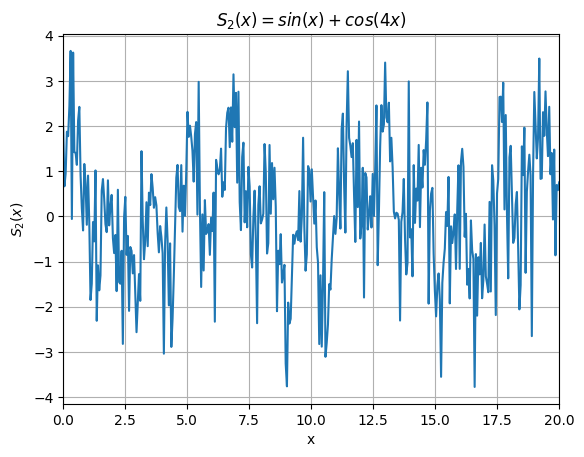

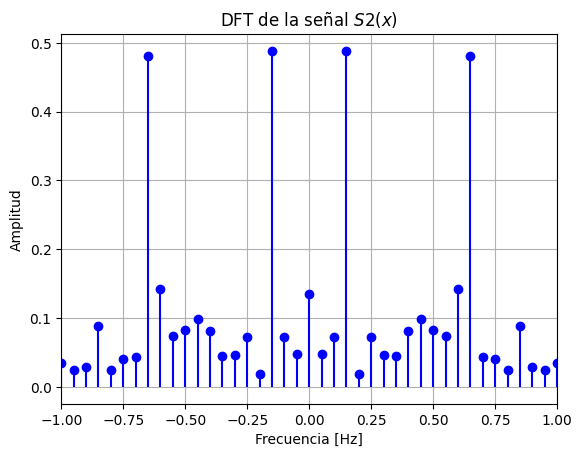

In [79]:
x = np.linspace(n0,nf,(nf-n0)*fs)       # Vector de muestras
s2 = np.cos(x) + np.sin(4*x)

media = 0
std_dev = 1

ruido = np.random.normal(media, std_dev, len(s2))

s2_noise = s2 + ruido

# Grafico señal s2 en el tiempo
plt.plot(x,s2_noise)
plt.xlim([n0,nf])
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$S_{2}(x)$')
plt.title(r'$S_{2}(x) = sin(x) + cos(4x)$')
plt.show()

S2 = dft(s2_noise)

# Obtencion de las frecuencias para graficar
freqs = fftfreq((nf-n0)*fs, nf/((nf-n0)*fs))

# Graficos señal S2 en frecuencia
plt.stem(freqs, 1/((nf-n0)*fs)*np.abs(S2),linefmt='b-', markerfmt='bo', basefmt=' ')
#plt.xticks(np.arange(-1,1,step=0.3))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title(r'DFT de la señal $S2(x)$')
plt.grid()
plt.xlim([-1,1])
plt.show()



<b>Punto 2</b>: El resultado de la Transformada de Fourier representa la descomposición de una señal en términos de sus componentes de frecuencia. Es decir, la transformada toma una señal en el dominio del tiempo y la convierte en una representación en el dominio de la frecuencia, mostrando la cantidad de energía presente en cada frecuencia en la señal original. Esto significa que el resultado de la Transformada de Fourier muestra qué componentes de frecuencia están presentes en la señal y con qué intensidad, como se observó en la transformada de fourier aplicada a una señal con ruido, donde se puede apreciar la aparicion de componentes en frecuencia con cierta energia en el espectro original de la señal. En el caso de la Transformada de Fourier en 2D, el resultado representa la descomposición de una imagen (o señal bidimensional) en términos de sus componentes de frecuencia en dos dimensiones: frecuencias espaciales en dirección horizontal y vertical. Cuando se aplica la Transformada de Fourier en 2D a una imagen, se obtiene una representación en el dominio de la frecuencia que muestra cómo se distribuye la energía de la imagen en diferentes frecuencias horizontales y verticales. Esto permite analizar la estructura de la imagen en términos de patrones repetitivos, bordes, texturas y otras características.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html